# Семинар № 1 - kNN, Bayes
---
Урок основан на открытых материалах [Evgeny Sokolov](https://github.com/esokolov) и [YSDA](https://github.com/yandexdataschool).

# Загрузка данных

In [2]:
# базовый набор для обработки даннных
import numpy as np
import pandas as pd

from collections import Counter
import functools

# отображение данных
import matplotlib.pyplot as plt
import seaborn as sns

# данные и алгоритмы ML
from sklearn import datasets

#%matplotlib inline
%load_ext autoreload
%autoreload 2

# matplotlib.rcParams['font.size'] = 11
# matplotlib.style = 'seaborn'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Сначала для загрузки набора данных мы будем использовать пакет [`sklearn`](https://scikit-learn.org/stable/), который будем активно использовать на протяжении всего курса.

sklearn реализует большинство классических и часто используемых алгоритмов машинного обучения. Также он предоставляет [Руководство пользователя] (https://scikit-learn.org/stable/user_guide.html), описывающее принципы каждой группы реализованных алгоритмов.

В качестве отправной точки для основных концепций sklearn мы рекомендуем [руководство по началу работы] (https://scikit-learn.org/stable/getting_started.html) (проверьте сами). [Дополнительные руководства] (https://scikit-learn.org/stable/tutorial/index.html) также могут быть полезны для развития ваших навыков.

Первая функциональность, которую мы используем, — удобная загрузка [общих наборов данных] (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets). Все, что нам нужно сделать, это всего лишь один вызов функции.

Объект, сгенерированный [`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html), описывается как:

> Объект, похожий на словарь, интересные атрибуты:
>
> «данные», данные для изучения,
>
> «цель», классификационные метки,
>
>‘target_names’, значение меток,
>
>‘feature_names’, значение функций,
>
> «DESCR», полное описание набора данных,
>
> «имя файла», физическое расположение набора данных CSV радужной оболочки (добавлено в версии 0.20)

Посмотрим, что у нас есть

In [4]:
dataset = datasets.load_iris()

print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Если вы не знакомы с набором данных Iris - найдите минутку, чтобы прочитать описание выше =) (как всегда [подробнее об этом в Википедии](https://en.wikipedia.org/wiki/Iris_flower_data_set))

__TL;DR__ 150 объектов, __равномерно__ распределенных по 3 классам, каждый из которых описан 4 непрерывными функциями.

In [5]:
# пока не нужно разбираться, что происходит в этом коде - просто посмотрите на таблицу

ext_target = dataset.target[:, None]
pd.DataFrame(
    np.concatenate((dataset.data, ext_target, dataset.target_names[ext_target]), axis=1),
    columns=dataset.feature_names + ['target label', 'target name'],
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target label,target name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [65]:
dataset.data 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Теперь дайте разные имена данным, которые мы будем использовать.

In [6]:
features = dataset.data
target = dataset.target

features.shape, target.shape

((150, 4), (150,))

## Визуализация данных

Наш набор данных имеет 4 измерения, однако люди чаще используют трехмерные или даже двухмерные данные, поэтому давайте нанесем первые 3 функции, окрашенные значениями меток.

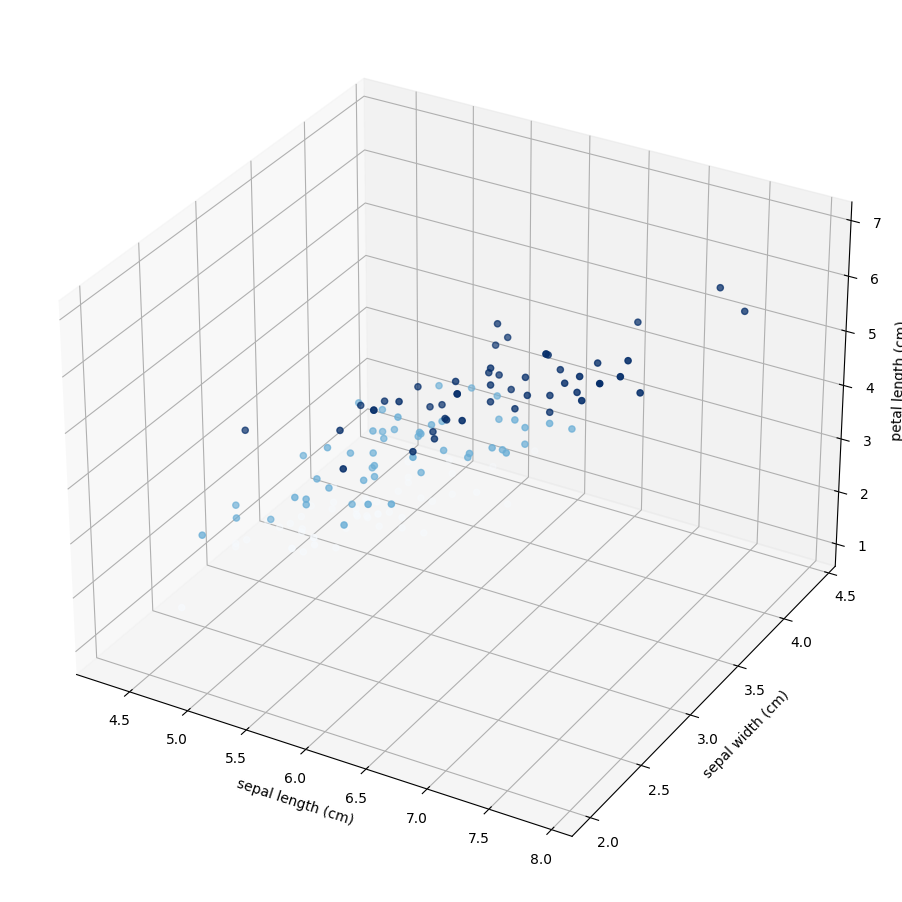

In [7]:
plt.style.use('_mpl-gallery')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(9, 9))
ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=target, marker='o')

ax.set_xlabel(dataset.feature_names[0])
ax.set_ylabel(dataset.feature_names[1])
ax.set_zlabel(dataset.feature_names[2])

plt.show()

## IID - Independent and Identical Distribution

In [8]:
# сформируем датасет
X = pd.DataFrame(features, columns=dataset['feature_names'])

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
print(dataset['target_names'])
y = target
y

['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
df = X.copy()
df['target'] = y

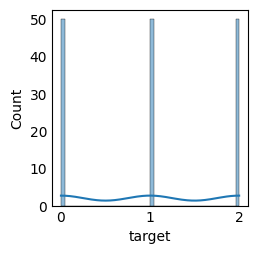

In [11]:
# нарисуем распределение меток, примерно одинакоке количество элементов каждого класса.

sns.histplot(x='target', data=df, bins=50, kde=True)
plt.xlabel('target')
plt.grid()
plt.show()

## Что можно сказать о данных по графику?

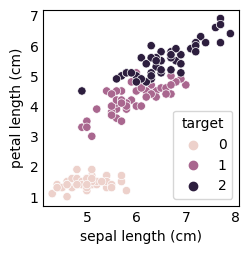

In [12]:
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='target', data=df)
plt.grid()
plt.show()

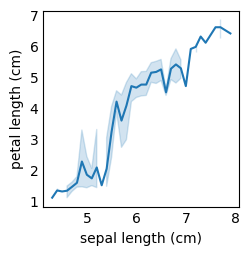

In [13]:
sns.lineplot(data=df, x="sepal length (cm)", y="petal length (cm)")
plt.grid()
plt.show()

Затем посмотрите на распределения функций

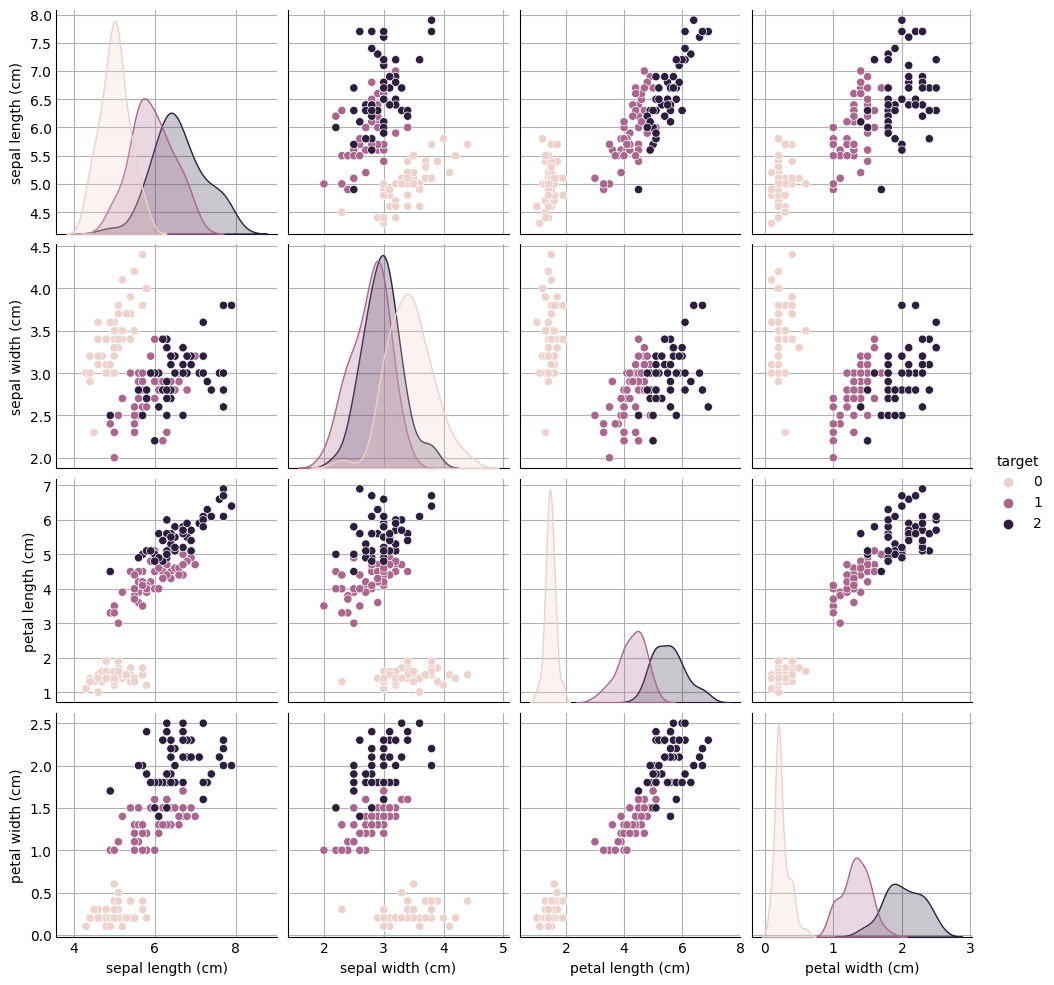

In [14]:
sns.pairplot(data=df, hue='target')
plt.show()

# нормальное распределение

В лекции говорилось об использовании априорного распределения для признаков, чаще всего мы используем Гауссово,

## why we can use GaussianDistribution?

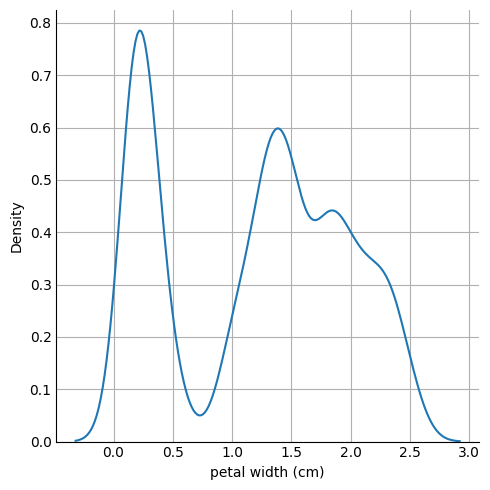

In [15]:
sns.displot(df['petal width (cm)'],kind="kde", bw_adjust=.5)

# тут на графике распределение для всех классов

Обратите внимание, что каждый график выше имеет собственный масштаб

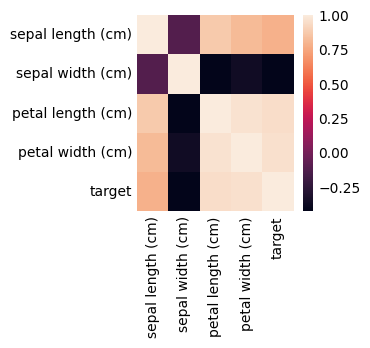

In [16]:
sns.heatmap(df.corr())
plt.show()

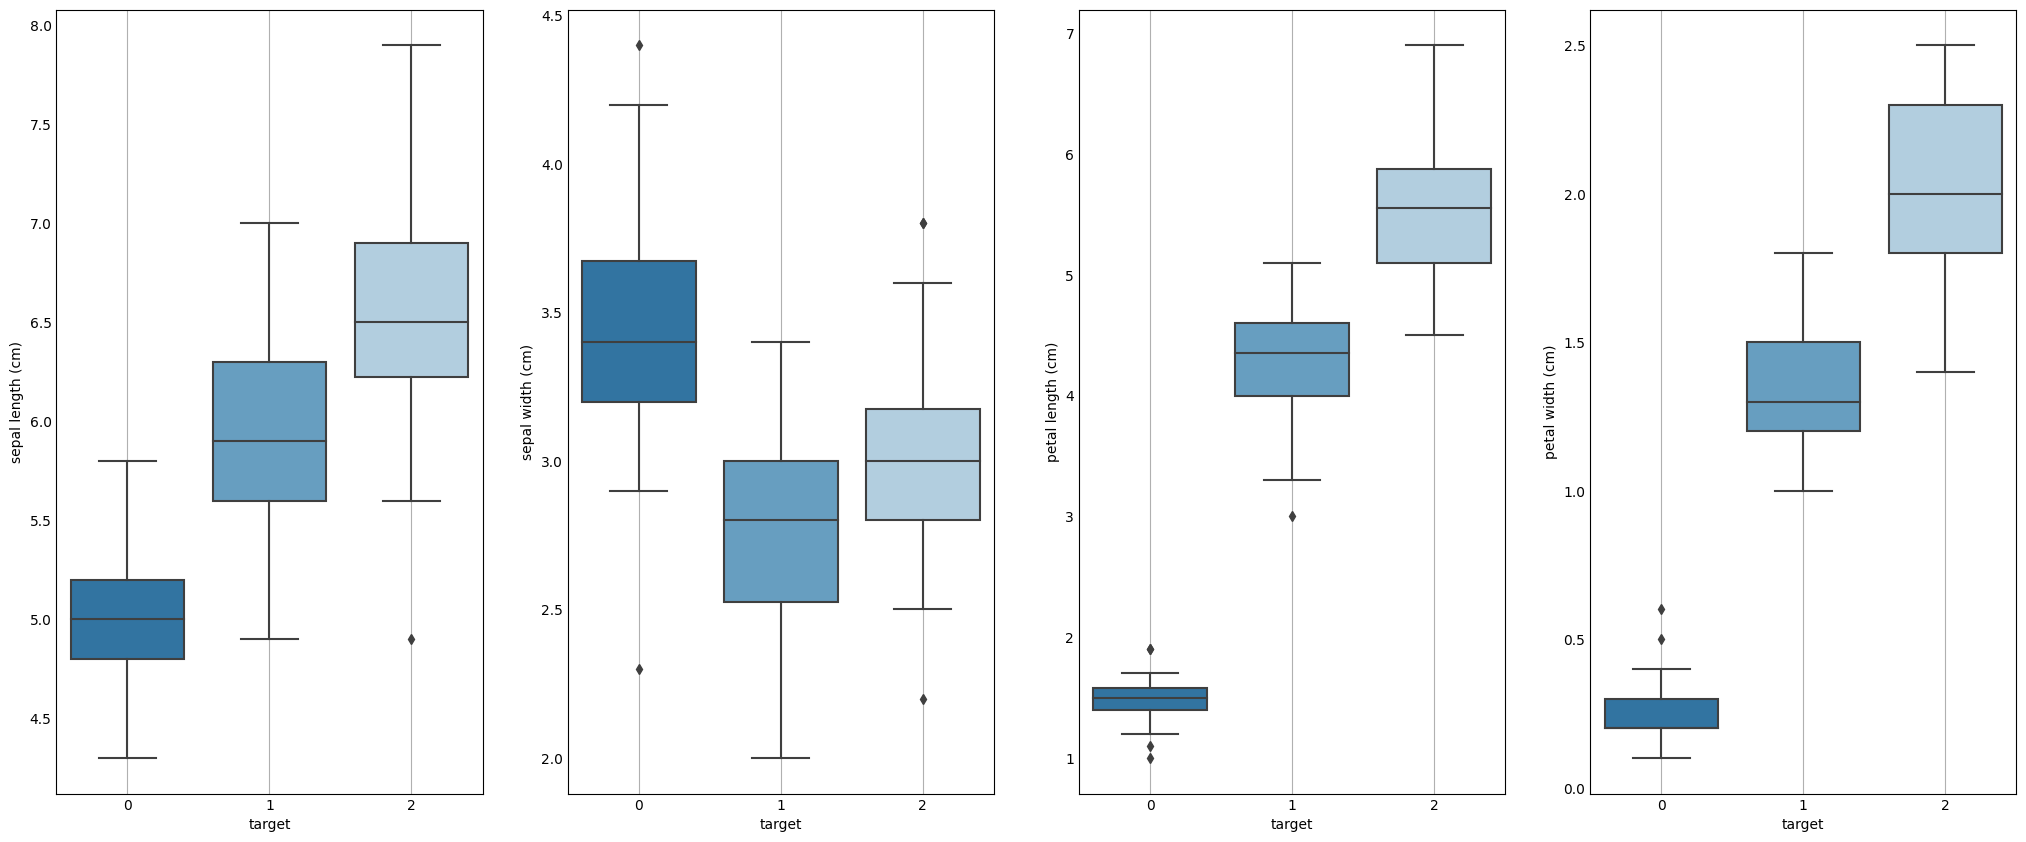

In [17]:
plt.figure(figsize=(20 , 8))

for i, col in enumerate(X.columns):
    plt.subplot(1, len(X.columns), i + 1)
    sns.boxplot(y=col, x='target', data=df)
    plt.grid()
    
plt.show()

# Naive Bayes Classifier

Поскольку мы стремимся сначала реализовать алгоритм наивного Байеса, нам нужно определить некоторое предварительное распределение.

Наиболее распространенное распределение (конечно) гауссово, и его параметры - среднее значение и стандартное отклонение. Давайте реализуем класс, принимающий список значений признаков, оценивающий параметры распределения и способный дать плотность вероятности любого заданного значения признака.

Обозначим нормальное распределение $\mathcal{N}(\mu, \sigma^2)$ PDF:
$$
f(x|\mu, \sigma^2) = \frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{(x - \mu)^2}{2\sigma^ 2})
$$
Давайте реализуем класс GaussianDistribution. (Конечно, на практике всегда можно использовать что-то вроде `scipy.stats.norm`).

Обратите внимание, что выполнение вычислений с логарифмическими вероятностями более стабильно.

$$
log(f(x|\mu, \sigma^2)) = -log(\sigma \sqrt{2 \pi})- \frac{(x - \mu)^2}{2\sigma^ 2}
$$

In [31]:
class GaussianDistribution:
    def __init__(self, feature):
        '''
        Args:
            feature: column of design matrix, represents all available values
                of feature to model.
                axis=0 stays for samples.
        '''
        self.mean = feature.mean(axis=0)
        self.std = feature.std(axis=0)

    def logpdf(self, value):
        '''Logarithm of probability density at value'''
        return -np.log(self.std * (2 * np.pi)**0.5) - (value - self.mean)**2 / (2 * self.std**2)
    
    def pdf(self, value):
        return np.exp(self.logpdf(value))
    
    def __repr__(self):
        return f'GaussianDistribution, mu={self.mean:.4f}, std={self.std:.4f}'
    
    
    

Проверяем результат:

In [32]:
import scipy

In [33]:
features.std(axis=0)

array([0.82530129, 0.43441097, 1.75940407, 0.75969263])

In [34]:
(((features - features.mean(axis=0))**2).sum(axis=0)/len(features))**0.5

array([0.82530129, 0.43441097, 1.75940407, 0.75969263])

In [35]:
_test = scipy.stats.norm(loc=features[:, :2].mean(axis=0), scale=features[:, :2].std(axis=0))

assert np.allclose(
    GaussianDistribution(features[:, :2]).logpdf(features[:5, :2]),
    _test.logpdf(features[:5, :2])
)
print('Seems fine!')

Seems fine!


In [36]:
_test.std()

array([0.82530129, 0.43441097])

In [37]:
GaussianDistribution(features[:, 0])

GaussianDistribution, mu=5.8433, std=0.8253

$$
P(A|B) = \frac{P(B|A) P(A)}{P(B)}
$$

Давайте теперь сосредоточимся на проблеме классификации. Для класса $K$ пометьте $y_i \in \{C_1, \ldots, C_k\}$. Задача классификации цветков имеет 3 класса, поэтому $K=3$. Теорема Байеса принимает следующий вид:

$$
P(y_i = C_k|\mathbf{x}_i) = \frac{P(\mathbf{x}_i|y_i = C_k) P(y_i = C_k)}{P(\mathbf{x}_i)}
$$

$$
x_i \in R^p - {вектор \: признаков}
$$

$$
P(\mathbf{x}_i|y_i = C_k) = \prod\limits_{l = 1}^p P(\mathbf{x}^l_i|y_i = C_k)
$$

Обратите внимание, что здесь мы также предпочитаем работать с логарифмическими вероятностями. Таким образом, приведенное выше уравнение примет следующий вид:
$$
\log P(y_i = C_k|\mathbf{x}_i) = \log P(\mathbf{x}_i|y_i = C_k) + \log P(y_i = C_k) - \log P(\mathbf{x} _i) = \sum_{l=1}^p\log P(\mathbf{x}_i^l|y_i = C_k) + \log P(y_i = C_k) - \log P(\mathbf{x} _i)
$$

Как можно заметить, для нахождения метки класса с наибольшей вероятностью нам даже не нужен последний член $P(\mathbf{x}_i)$ (т.к он не зависит от k). Однако это необходимо для получения правильной оценки вероятности $P(y_i = C_k|\mathbf{x}_i)$. Член $P(\mathbf{x}_i)$ можно вычислить, используя следующее свойство:
$$
P(\mathbf{x}_i) = \sum_{k=1}^K P(\mathbf{x}_i|y_i=C_k).
$$
Его можно вычислить из значений $\log P(\mathbf{x}_i|y_i=C_k)$ с помощью функции `logsumexp`, расположенной в `scipy.special`.

Теперь давайте реализуем сам классификатор Naive Bayes. Приведенный ниже класс унаследован от базовых классов ```sklearn``` и предоставляет все основные методы.

[BaseEstimator](https://stackoverflow.com/questions/15233632/baseestimator-in-sklearn-base-python) - for grid search

[ClassifierMixin](https://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html) - for mean accuracy

In [38]:
from sklearn.base import BaseEstimator, ClassifierMixin 
from scipy.special import logsumexp

In [50]:
class NaiveBayes(BaseEstimator, ClassifierMixin):
    '''
    Обратите внимание, что использование `X` и `y` для матрицы дизайна и меток в целом не является хорошим выбором,
    лучше придерживаться более информативных соглашений об именах.
    Однако, чтобы сделать код совместимым с реализацией sklearn, мы используем здесь переменные `X` и `y`.
    '''
    def fit(self, X, y, sample_weight=None, distributions=None):
        '''
        sample_weight 
            The argument is ignored. For comatibility only.
        '''
        self.unique_labels = np.unique(y)
        
        # If distributions of features are not specified, they a treated Gaussian
        if distributions is None:
            distributions = [GaussianDistribution] * X.shape[1]
        else:
            # Check whether distributions are passed for all features
            assert len(distributions) == X.shape[1]        

            
        # Здесь мы находим параметры распределения для каждой функции в каждом подмножестве классов
        # поэтому P(x^i|y=C_k) будет оцениваться только с использованием информации из i-го признака значений класса C_k
        self.conditional_feature_distributions = {} # label: [distribution for feature 1, ...]
        for label in self.unique_labels:
            feature_distribution = []
            for column_index in range(X.shape[1]): # count of features
                # `column_index` feature values for objects from `label` class
                feature_column = X[y == label, column_index]
                fitted_distr = distributions[column_index](feature_column)
                feature_distribution.append(fitted_distr)
            self.conditional_feature_distributions[label] = feature_distribution

        # Prior label distributions (unconditional probability of each class)
        self.prior_label_distribution = {unique_label: np.sum(y == unique_label) / len(y) for unique_label in self.unique_labels}

    def predict_log_proba(self, X):
        # Matrix of shape (n_objects : n_classes)
        class_log_probas = np.zeros((X.shape[0], len(self.unique_labels)), dtype=float)
        
        # Здесь мы вычисляем логарифмические вероятности класса для каждого класса последовательно
        for label_idx, label in enumerate(self.unique_labels):
            for idx in range(X.shape[1]):
                # Вся логарифмическая вероятность для каждого признака -- фиксированная метка
                class_log_probas[:, label_idx] += self.conditional_feature_distributions[label][idx].logpdf(X[:, idx]) 

            # Add log proba of label prior
            class_log_probas[:, label_idx] += np.log(self.prior_label_distribution[label]) # <YOUR CODE HERE>

        
        class_log_probas -= logsumexp(class_log_probas, axis=1)[:, None] 
        return class_log_probas
    
    def predict_proba(self, X):
        return np.exp(self.predict_log_proba(X))
    
    def predict(self, X):
        log_probas = self.predict_log_proba(X)
        # нам нужно привести метки к их первоначальному виду (они могут начинаться с числа, отличного от 0)
        return np.array([self.unique_labels[idx] for idx in log_probas.argmax(axis=1)])
    

In [51]:
nb = NaiveBayes()
nb.fit(features, target)

In [52]:
assert len(nb.conditional_feature_distributions) == 3
assert len(nb.conditional_feature_distributions[0]) == 4

In [53]:
nb.conditional_feature_distributions

{0: [GaussianDistribution, mu=5.0060, std=0.3489,
  GaussianDistribution, mu=3.4280, std=0.3753,
  GaussianDistribution, mu=1.4620, std=0.1719,
  GaussianDistribution, mu=0.2460, std=0.1043],
 1: [GaussianDistribution, mu=5.9360, std=0.5110,
  GaussianDistribution, mu=2.7700, std=0.3106,
  GaussianDistribution, mu=4.2600, std=0.4652,
  GaussianDistribution, mu=1.3260, std=0.1958],
 2: [GaussianDistribution, mu=6.5880, std=0.6295,
  GaussianDistribution, mu=2.9740, std=0.3193,
  GaussianDistribution, mu=5.5520, std=0.5463,
  GaussianDistribution, mu=2.0260, std=0.2719]}

In [54]:
assert np.unique(list(nb.prior_label_distribution.values())) == np.array([0.3333333333333333333])

In [55]:
print('log probas:\n{}'.format(nb.predict_log_proba(features[:2])))
print('predicted probas:\n{}'.format(nb.predict_proba(features[:2])))
print('predicted labels:\n{}'.format(nb.predict(features[:2])))
print('\nIt`s alive! More tests coming.')

log probas:
[[  0.         -41.14063634 -57.90531295]
 [  0.         -38.72865982 -56.71097942]]
predicted probas:
[[1.00000000e+00 1.35784018e-18 7.11282484e-26]
 [1.00000000e+00 1.51480506e-17 2.34819724e-25]]
predicted labels:
[0 0]

It`s alive! More tests coming.


Теперь давайте проверим наш наивный байесовский классификатор на необработанных данных. Для этого мы будем использовать `train_test_split` из `sklearn`.

In [56]:
from sklearn.model_selection import train_test_split

## stratify=target

In [58]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25,
                                                                            stratify=target)

print(features_train.shape, features_test.shape)

(112, 4) (38, 4)


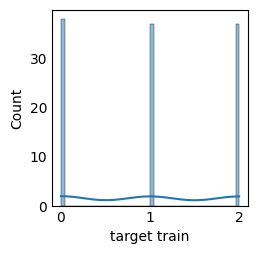

In [59]:
sns.histplot(data=target_train, bins=50, kde=True)
plt.xlabel('target train')
plt.grid()
plt.show()

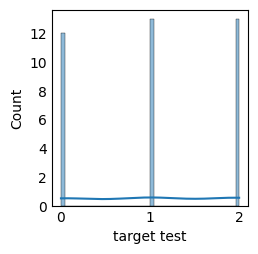

In [60]:
sns.histplot(data=target_test, bins=50, kde=True)
plt.xlabel('target test')
plt.grid()
plt.show()

In [66]:
nb = NaiveBayes()
nb.fit(features_train, target_train, distributions=[GaussianDistribution]*4)
nb_test_log_proba = nb.predict_log_proba(features_test)

In [67]:
print('Naive Bayes classifier accuracy on the train set: {}'.format(nb.score(features_train, target_train)))

Naive Bayes classifier accuracy on the train set: 0.9553571428571429


In [68]:
print('Naive Bayes classifier accuracy on the test set: {}'.format(nb.score(features_test, target_test)))

Naive Bayes classifier accuracy on the test set: 0.9473684210526315


Наконец, давайте сравним наивный байесовский классификатор с реализациями ```sklearn```.

In [64]:
from sklearn import naive_bayes

In [38]:
sklearn_nb = naive_bayes.GaussianNB()
sklearn_nb.fit(features_train, target_train)
sklearn_nb_test_log_proba = sklearn_nb.predict_log_proba(features_test)

In [39]:
print('sklearn implementation accuracy on the train set: {}'.format(sklearn_nb.score(features_train, target_train)))

sklearn implementation accuracy on the train set: 0.9732142857142857


In [40]:
print('sklearn implementation accuracy on the test set: {}'.format(sklearn_nb.score(features_test, target_test)))

sklearn implementation accuracy on the test set: 0.9473684210526315


Проверим прогнозы. Если вы использовали распределение Гаусса и все сделали правильно, логарифмические вероятности должны быть одинаковыми.

In [41]:
assert np.allclose(nb_test_log_proba, sklearn_nb_test_log_proba), 'log probabilities do not match'
print('Seems alright!')

Seems alright!


# Naive Bayes in text classification
### [Dataset](https://paperswithcode.com/dataset/sst) sentences extracted from movie reviews.


In [45]:
# do not change the code in the block below
# __________start of block__________
df_text = pd.read_csv(
    'https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv',
    delimiter='\t',
    header=None
)

texts_train = df_text[0].values[:5000]
y_train = df_text[1].values[:5000]
texts_test = df_text[0].values[5000:]
y_test = df_text[1].values[5000:]

from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower()))

text = 'How to be a grown-up at work: replace "I don\'t want to do that" with "Ok, great!".'
print("before:", text,)
print("after:", preprocess(text),)

texts_train = [preprocess(text) for text in texts_train]
texts_test = [preprocess(text) for text in texts_test]

# Small check that everything is done properly
assert texts_train[5] ==  'campanella gets the tone just right funny in the middle of sad in the middle of hopeful'
assert texts_test[74] == 'poetry in motion captured on film'
assert len(texts_test) == len(y_test)
# __________end of block__________

before: How to be a grown-up at work: replace "I don't want to do that" with "Ok, great!".
after: how to be a grown - up at work : replace " i don ' t want to do that " with " ok , great !".


In [46]:
k = min(10000, len(set(' '.join(texts_train).split())))

counts = Counter(' '.join(texts_train).split()) # сколько каждого слова в тренировочной выборке (типо словарь)

bow_vocabulary = [key for key, val in counts.most_common(k)] # список k чаще всего встречающихся слов


def text_to_bow(text, bow_voc):
    """ convert text string to an array of token counts. Use bow_vocabulary. """
    sent_vec = np.zeros(len(bow_voc))
    counts = Counter(text.split())
    for i, token in enumerate(bow_voc):
        if token in counts:
            sent_vec[i] = counts[token]
    return np.array(sent_vec, 'float32')

# в итоге мы получим матрицу, где строка матрицы показывает наличие или отсутствие слова в исходной строке
X_train_bow = np.stack(list(map(functools.partial(text_to_bow, bow_voc=bow_vocabulary), texts_train))) # применили к каждому списку из слов функцию, которая возвращает число встретившихся слов по списку bow_vocabulary 
X_test_bow = np.stack(list(map(functools.partial(text_to_bow, bow_voc=bow_vocabulary), texts_test)))

# Small check that everything is done properly if you are using local bow implementation
k_max = len(set(' '.join(texts_train).split()))
assert X_train_bow.shape == (len(texts_train), min(k, k_max))
assert X_test_bow.shape == (len(texts_test), min(k, k_max))
assert np.all(X_train_bow[5:10].sum(-1) == np.array([len(s.split()) for s in  texts_train[5:10]]))
assert len(bow_vocabulary) <= min(k, k_max)
assert X_train_bow[65, bow_vocabulary.index('!')] == texts_train[65].split().count('!')

In [47]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB# your code here

In [48]:
clf_nb_bow = MultinomialNB()# your code here
clf_nb_bow.fit(X_train_bow, y_train)

MultinomialNB()

In [49]:
print('sklearn implementation accuracy on the test set: {}'.format(clf_nb_bow.score(X_test_bow, y_test)))

sklearn implementation accuracy on the test set: 0.79375


In [50]:
clf_nb_bow_my = NaiveBayes()
clf_nb_bow_my.fit(X_train_bow, y_train)

In [51]:
X_train_bow.shape

(5000, 10000)

In [52]:
print('sklearn implementation accuracy on the test set: {}'.format(clf_nb_bow_my.score(X_test_bow, y_test)))

sklearn implementation accuracy on the test set: 0.6385416666666667


## [The Optimality of Naive Bayes](https://www.cs.unb.ca/~hzhang/publications/FLAIRS04ZhangH.pdf)

# kNN - метод ближайших соседей

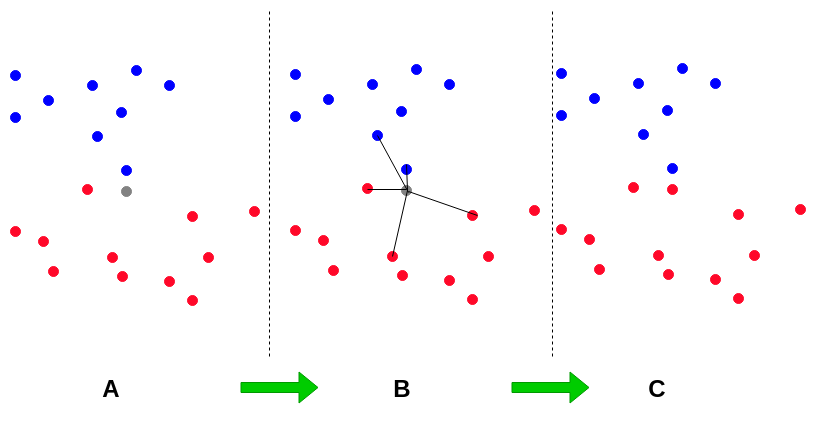

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X[['sepal length (cm)', 'petal length (cm)']], y,
                                                    train_size=0.8, test_size=0.2,
                                                    shuffle=True, random_state=42, stratify=y)

((array([ 6., 19., 13., 22., 14., 20., 11.,  5.,  4.,  6.]),
  array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
  <BarContainer object of 10 artists>),
 (array([36.,  4.,  0.,  1.,  7., 23., 22., 13.,  9.,  5.]),
  array([1.1 , 1.68, 2.26, 2.84, 3.42, 4.  , 4.58, 5.16, 5.74, 6.32, 6.9 ]),
  <BarContainer object of 10 artists>))

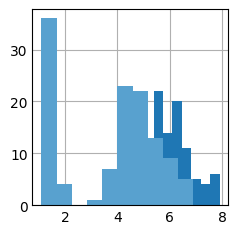

In [71]:
plt.hist(X_train['sepal length (cm)']), plt.hist(X_train['petal length (cm)'])

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
print(f"after normalization mean: {X_train[:,1].mean()}, std: {X_train[:,1].std()}")

after normalization mean: 4.958996176659033e-16, std: 1.0000000000000002


In [74]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

((array([ 6., 19., 13., 22., 17., 17., 11.,  5.,  4.,  6.]),
  array([-1.84098286, -1.41108848, -0.98119411, -0.55129973, -0.12140536,
          0.30848902,  0.73838339,  1.16827777,  1.59817215,  2.02806652,
          2.4579609 ]),
  <BarContainer object of 10 artists>),
 (array([36.,  4.,  0.,  1., 12., 18., 22., 13.,  9.,  5.]),
  array([-1.5160669 , -1.18673402, -0.85740113, -0.52806825, -0.19873536,
          0.13059752,  0.45993041,  0.7892633 ,  1.11859618,  1.44792907,
          1.77726195]),
  <BarContainer object of 10 artists>))

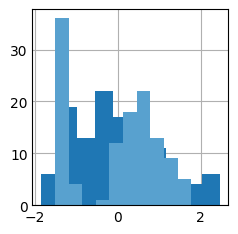

In [75]:
plt.hist(X_train[:,0]), plt.hist(X_train[:,1])

In [76]:
knn = KNeighborsClassifier() # По умочанию - 5 соседей и Евклидова метрика

In [77]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
pred = pd.DataFrame(knn.predict(X_test), columns=['predict'])
pred['test'] = y_test

In [81]:
pred.head()

,predict,test
0,0,0
1,1,2
2,1,1
3,1,1
4,0,0


In [82]:
accuracy_score(knn.predict(X_test), y_test)

0.9

In [83]:
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)
accuracy_score(knn.predict(X_test), y_test)

0.8666666666666667

In [84]:
knn = KNeighborsClassifier(80)
knn.fit(X_train, y_train)
accuracy_score(knn.predict(X_test), y_test)

0.6

## Parameters and Hyper parameters
## [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [85]:
from sklearn.model_selection import GridSearchCV

In [91]:
k_range = list(range(1, 60))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True, verbose=1)

grid_search = grid.fit(X_train, y_train)

Fitting 10 folds for each of 59 candidates, totalling 590 fits


In [92]:
grid_search.best_estimator_

KNeighborsClassifier()

In [93]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ * 100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 5}
Accuracy for our training dataset with tuning is : 95.83%


## kNN from scratch

В первом задании вы реализуете один из простейших алгоритмов машинного обучения - классификатор на основе метода K-ближайших соседей.
Мы применим его к задачам
- бинарной классификации (то есть, только двум классам)
- многоклассовой классификации (то есть, нескольким классам)

Так как методу необходим гиперпараметр (hyperparameter) - количество соседей, мы выберем его на основе кросс-валидации (cross-validation).

In [99]:
from sklearn.datasets import load_digits

## Загрузим и визуализируем данные

In [100]:
dataset = datasets.load_digits()

print(dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [101]:
features = dataset.data
target = dataset.target

features.shape, target.shape

((1797, 64), (1797,))

In [102]:
train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.25, stratify=target, random_state=26)

print(train_X.shape, train_y.shape)

(1347, 64) (1347,)


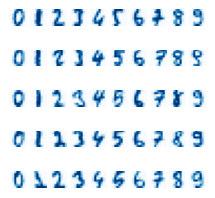

In [103]:
samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1

for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index].reshape((8,8))
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

In [104]:
scaler_min = train_X.min()
scaler_max = train_X.max()

In [105]:
train_X = (train_X - scaler_min)/(scaler_max - scaler_min)
test_X = (test_X - scaler_min)/(scaler_max - scaler_min)

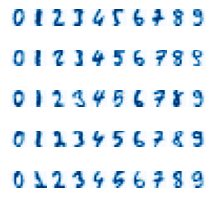

In [106]:
samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1

for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index].reshape((8,8))
        plt.imshow(image, vmin=0, vmax=1)
        plt.axis('off')
        plot_index += 1

In [121]:
# scaler_digits = StandardScaler()
# train_X = scaler_digits.fit_transform(train_X)
# test_X = scaler_digits.transform(test_X)

## Сначала реализуем KNN для бинарной классификации

В качестве задачи бинарной классификации мы натренируем модель, которая будет отличать цифру 0 от цифры 9.

In [107]:
# Сначала подготовим метки и исходные данные

# Выберите только 0 и 9
binary_train_mask = (train_y == 0) | (train_y == 9)
binary_train_X = train_X[binary_train_mask]
binary_train_y = train_y[binary_train_mask] == 0

binary_test_mask = (test_y == 0) | (test_y == 9)
binary_test_X = test_X[binary_test_mask]
binary_test_y = test_y[binary_test_mask] == 0

# Преобразование в одномерный массив [num_samples, 32*32*3]
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)

In [108]:
print(f"proportion train: {binary_train_y.sum()/len(binary_train_y)},\nproportion test: {binary_test_y.sum()/len(binary_test_y)}")

proportion train: 0.4962686567164179,
proportion test: 0.5


In [109]:
binary_train_X.shape, binary_train_y.shape

((268, 64), (268,))

In [110]:
binary_test_X.shape, binary_test_y.shape

((90, 64), (90,))

In [126]:
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances


class KNN:
    """
    K-neariest-neighbor classifier using L1 loss
    """
    def __init__(self, k=1):
        self.k = k

    def fit(self, X, y):
        self.train_X = X
        self.train_y = y

    def predict(self, X, num_loops=2):
        '''
        Uses the KNN model to predict clases for the data samples provided
        
        Arguments:
        X, np array (num_samples, num_features) - samples to run
           through the model
        num_loops, int - which implementation to use

        Returns:
        predictions, np array of ints (num_samples) - predicted class
           for each sample
        '''
        if num_loops == 0:
            dists = self.compute_distances_no_loops(X)
        elif num_loops == 1:
            dists = self.compute_distances_one_loop(X)
        else:
            dists = self.compute_distances_two_loops(X)
        
        return self._predict(dists)

    def compute_distances_two_loops(self, X):
        '''
        Computes L1 distance from every sample of X to every training sample
        Uses simplest implementation with 2 Python loops

        Arguments:
        X, np array (num_test_samples, num_features) - samples to run
        
        Returns:
        dists, np array (num_test_samples, num_train_samples) - array
           with distances between each test and each train sample
        '''
        num_train = self.train_X.shape[0]
        num_test = X.shape[0]
        dists = np.zeros((num_test, num_train), np.float32)
        
        for i_test in range(num_test):
            for i_train in range(num_train):
                dists[i_test][i_train] =np.sum(np.abs(X[i_test]-self.train_X[i_train])) # <YOUR CODE HERE>
                
        return dists
    
    def compute_distances_one_loop(self, X):
        '''
        Computes L1 distance from every sample of X to every training sample
        Vectorizes some of the calculations, so only 1 loop is used

        Arguments:
        X, np array (num_test_samples, num_features) - samples to run
        
        Returns:
        dists, np array (num_test_samples, num_train_samples) - array
           with distances between each test and each train sample
        '''
        num_train = self.train_X.shape[0]
        num_test = X.shape[0]
        dists = np.zeros((num_test, num_train), np.float32)
        for i_test in range(num_test):
            dists[i_test] = np.sum(abs(self.train_X - X[i_test]), axis=1) # <YOUR CODE HERE>
            
        return dists

    def compute_distances_no_loops(self, X):
        '''
        Computes L1 distance from every sample of X to every training sample
        Fully vectorizes the calculations using numpy

        Arguments:
        X, np array (num_test_samples, num_features) - samples to run
        
        Returns:
        dists, np array (num_test_samples, num_train_samples) - array
           with distances between each test and each train sample
        '''
        num_train = self.train_X.shape[0]
        num_test = X.shape[0]
        # Using float32 to to save memory - the default is float64
        dists = np.zeros((num_test, num_train), np.float32)
        # TODO: Implement computing all distances with no loops!
        dists = manhattan_distances(self.train_X, X)
        
        return dists.T

    def _predict(self, dists):
        '''
        Returns model predictions for binary classification case
        
        Arguments:
        dists, np array (num_test_samples, num_train_samples) - array
           with distances between each test and each train sample

        Returns:
        pred, np array of bool (num_test_samples) - binary predictions 
           for every test sample
        '''
        num_test = dists.shape[0]
        pred = np.zeros(num_test, int)
        for i in range(num_test):
            unique, counts = np.unique(np.take(self.train_y, np.argsort(dists[i])[:self.k]), return_counts=True)
            pred[i] = unique[np.argmax(counts)]
            
        return pred

    

In [127]:
# Создайте классификатор и вызовите его для обучения модели
# KNN просто запоминает все данные

knn_classifier = KNN(k=1)
knn_classifier.fit(binary_train_X, binary_train_y)

## Пришло время написать код! 

Последовательно реализуйте функции `compute_distances_two_loops` и `compute_distances_no_loops`

Эти функции строят массив расстояний между всеми векторами в тестовом наборе и в тренировочном наборе.  
В результате они должны построить массив размера `(num_test, num_train)`, где координата `[i][j]` соотвествует расстоянию между i-м вектором в test (`test[i]`) и j-м вектором в train (`train[j]`).

**Обратите внимание** Для простоты реализации мы будем использовать в качестве расстояния меру L1 (ее еще называют [Manhattan distance](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2)).

In [128]:
# TODO: implement compute_distances_two_loops
dists = knn_classifier.compute_distances_two_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [129]:
# TODO: implement compute_distances_one_loop
dists = knn_classifier.compute_distances_one_loop(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [130]:
# TODO: implement compute_distances_no_loops
dists = knn_classifier.compute_distances_no_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [131]:
# Lets look at the performance difference
%timeit knn_classifier.compute_distances_two_loops(binary_test_X)
%timeit knn_classifier.compute_distances_one_loop(binary_test_X)
%timeit knn_classifier.compute_distances_no_loops(binary_test_X)

297 ms ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.81 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.43 ms ± 54.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [132]:
# TODO: implement predict_labels_binary
prediction = knn_classifier.predict(binary_test_X, num_loops=2)

In [133]:
prediction

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1])

In [134]:
a = np.array([1, 0, 0, 1, 1])
unique, counts = np.unique(a, return_counts=True)
unique[np.argmax(counts)]

1

In [135]:
unique, counts

(array([0, 1]), array([2, 3], dtype=int64))

In [136]:
def binary_classification_metrics(prediction, ground_truth):
    '''
    Вычисляет метрики для бинарной классификации
    Аргументы:
     prediction, np массив bool (num_samples) - предсказания модели
     ground_truth, np массив bool (num_samples) - истинные метки
    Возвращает:
     точность, отзыв, f1, точность - показатели классификации
    '''
    tp = np.sum([(prediction[i] == True and ground_truth[i] == True) for i in range(prediction.shape[0])])
    tn = np.sum([(prediction[i] == False and ground_truth[i] == False) for i in range(prediction.shape[0])])
    fp = np.sum([(prediction[i] == True and ground_truth[i] == False) for i in range(prediction.shape[0])])
    fn = np.sum([(prediction[i] == False and ground_truth[i] == True) for i in range(prediction.shape[0])])
            
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fn + fp)
    f1 = 2 * tp / (2 * tp + fp + fn )
    
    return precision, recall, f1, accuracy

In [137]:
# TODO: implement binary_classification_metrics
precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 1
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00


In [138]:
# Давайте соберем все вместе и запустим KNN с k=3 и посмотрим, что у нас получится

knn_classifier_3 = KNN(k=3)
knn_classifier_3.fit(binary_train_X, binary_train_y)
prediction = knn_classifier_3.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier_3.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 3
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00


# Кросс-валидация (cross-validation)

Попробуем найти лучшее значение параметра k для алгоритма KNN! 

Для этого мы воспользуемся k-fold [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation). Мы разделим тренировочные данные на 5 фолдов (folds), и по очереди будем использовать каждый из них в качестве проверочных данных (validation data), а остальные -- в качестве тренировочных (training data).

В качестве финальной оценки эффективности k мы усредним значения F1 score на всех фолдах.
После этого мы просто выберем значение k с лучшим значением метрики.

In [139]:
from sklearn.model_selection import KFold

In [140]:
binary_train_X.shape

(268, 64)

In [141]:
# Найдите лучший k, используя перекрестную проверку на основе оценки F1
# TODO: разделить тренировочные данные на 5 частей и сохранить их в train_folds_X/train_folds_y
num_folds = 5


k_choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 100, 200]
k_to_f1 = {}  # отображает значения k в F1 (int -> float)

In [142]:
kf = KFold(n_splits=num_folds)
kf.get_n_splits(binary_train_X)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [143]:
for k in k_choices:
    _f1 = np.zeros(num_folds)
    for i, (train_index, test_index) in enumerate(kf.split(binary_train_X)):
        _train_x = binary_train_X[train_index]
        _test_x = binary_train_X[test_index]
        _train_y = binary_train_y[train_index]
        _test_y = binary_train_y[test_index]
        knn = KNN(k)
        knn.fit(_train_x, _train_y)
        prediction = knn.predict(_test_x)
        _, _, f1, _ = binary_classification_metrics(prediction, _test_y)
        _f1[i] = f1
    k_to_f1.update({k : sum(_f1) / num_folds})

for k in sorted(k_to_f1):
    print('k = %d, f1 = %f' % (k, k_to_f1[k]))

k = 1, f1 = 1.000000
k = 2, f1 = 1.000000
k = 3, f1 = 1.000000
k = 4, f1 = 1.000000
k = 5, f1 = 1.000000
k = 6, f1 = 1.000000
k = 7, f1 = 1.000000
k = 8, f1 = 1.000000
k = 9, f1 = 1.000000
k = 10, f1 = 1.000000
k = 15, f1 = 1.000000
k = 20, f1 = 1.000000
k = 25, f1 = 1.000000
k = 50, f1 = 1.000000
k = 100, f1 = 0.996226
k = 200, f1 = 0.865840


### Проверим, как хорошо работает лучшее значение k на тестовых данных (test data)

In [144]:
# TODO: Установите лучший k на лучшее значение, найденное перекрестной проверкой

best_k = 10# <YOUR CODE HERE>

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(binary_train_X, binary_train_y)
prediction = best_knn_classifier.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

Best KNN with k = 10
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00


# Многоклассовая классификация (multi-class classification)

Переходим к следующему этапу - классификации на каждую цифру.

In [145]:
train_X.shape

(1347, 64)

In [146]:
train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.25, stratify=target, random_state=100)

print(train_X.shape, train_y.shape)

(1347, 64) (1347,)


In [147]:
# Теперь давайте использовать все 10 классов

train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

knn_classifier = KNN(k=1)
knn_classifier.fit(train_X, train_y)

In [148]:
train_X.shape

(1347, 64)

In [149]:
# TODO: Implement predict_labels_multiclass
predict = knn_classifier.predict(test_X)

In [150]:
def multiclass_accuracy(predictions, ground_truth):
    accuracy = len(predictions[predictions == ground_truth])/(len(ground_truth)) #None # <YOUR CODE HERE>
    
    return accuracy

In [151]:
# TODO: Implement multiclass_accuracy

accuracy = multiclass_accuracy(predict, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.98


In [152]:
kf.split(train_X).__next__()

(array([ 270,  271,  272, ..., 1344, 1345, 1346]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,


Снова кросс-валидация. Теперь нашей основной метрикой стала точность (accuracy), и ее мы тоже будем усреднять по всем фолдам.

In [153]:
%%time
# Найдите лучший k, используя перекрестную проверку на основе точности
# TODO: разделить тренировочные данные на 5 частей и сохранить их в train_folds_X/train_folds_y

num_folds = 5
kf = KFold(n_splits=num_folds)
kf.get_n_splits(train_X)


#k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50, 400, 500]
k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50, 400, 500]
k_to_accuracy = {}
k_to_f1 = {}

for k in k_choices:
    _f1 = np.zeros(num_folds)
    for i, (train_index, test_index) in enumerate(kf.split(train_X)):
        _train_x = train_X[train_index]
        _test_x = train_X[test_index]
        _train_y = train_y[train_index]
        _test_y = train_y[test_index]
        knn = KNN(k)
        knn.fit(_train_x, _train_y)
        prediction = knn.predict(_test_x)
        _, _, f1, _ = binary_classification_metrics(prediction, _test_y)
        _f1[i] = f1
    k_to_f1.update({k : sum(_f1) / num_folds})

for k in sorted(k_to_f1):
    print('k = %d, f1 = %f' % (k, k_to_f1[k]))

k = 1, f1 = 1.000000
k = 2, f1 = 1.000000
k = 3, f1 = 1.000000
k = 5, f1 = 1.000000
k = 8, f1 = 1.000000
k = 10, f1 = 1.000000
k = 15, f1 = 1.000000
k = 20, f1 = 1.000000
k = 25, f1 = 1.000000
k = 50, f1 = 1.000000
k = 400, f1 = 1.000000
k = 500, f1 = 0.993939
Wall time: 3min 38s


### Финальный тест - классификация на 10 классов на тестовой выборке (test data)

In [59]:
# TODO: Установите лучший k на лучшее значение, найденное перекрестной проверкой

best_k =  # <YOUR CODE HERE>

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(train_X, train_y)
prediction = best_knn_classifier.predict(test_X)

accuracy = multiclass_accuracy(prediction, test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f" % accuracy)

Best KNN with k = 6
Accuracy: 0.99
